In [1]:
import pandas as pd
df = pd.read_clipboard()
df.head()

,游戏平台,币种,转入,转出,投注人数(公司),投注次数(公司),下注金额(公司),投注金额(公司),游戏人数(玩家对战),投注次数(玩家对战),...,总投注金额,总有效投注,派彩额,公司输赢,人均投注额,人均投注次数,日期,游戏大类,游戏人数,月份
0,AG真人,JPY,0.0,0.0,0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2023/8/1,真人,0,8月
1,AG真人,MXN,0.0,0.0,0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2023/8/1,真人,0,8月
2,AG真人,NGN,0.0,0.0,0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2023/8/1,真人,0,8月
3,AG真人,MYR,0.0,0.0,0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2023/8/1,真人,0,8月
4,AG真人,USD,0.0,0.0,0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2023/8/1,真人,0,8月


C:\ProgramData\anaconda3\envs\schedule\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\envs\schedule\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\envs\schedule\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\envs\schedule\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\envs\schedule\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25429 (\N{CJK UNIFIED IDEOGRAPH-6355}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\envs\sched

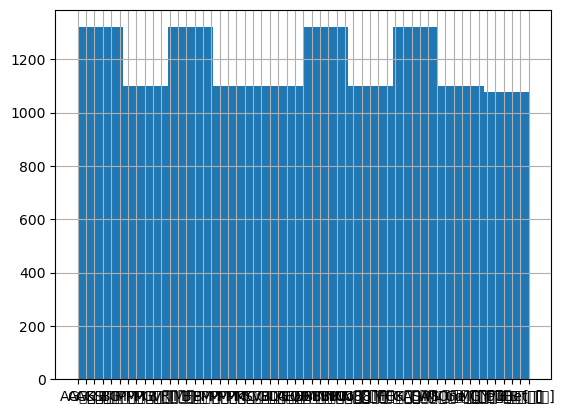

In [67]:
import time
import requests
import json
import telebot
import hmac, base64, struct, hashlib
import platform
from selenium import webdriver

submit_url = 'http://fundmng.bsportsadmin.com/api/manage/user/admin/login/submit'
header0 = {
    'Accept':'application/json, text/plain, */*',
    # 'Accept-Encoding':'gzip, deflate',
    'Accept-Language':'zh-CN,zh;q=0.9',
    'Connection':'keep-alive',
    'Content-Length':'48',
    'Content-Type':'application/x-www-form-urlencoded',
    'Cookie':'admin-uid=690; admin-token=db76bebda5274c80adaadd40bd794f24',
    'Device_id':'1.0',
    'Gl_version':'2.0',
    'Host':'fundmng.bsportsadmin.com',
    'Language':'zh_CN',
    'Origin':'http://fundmng.bsportsadmin.com',
    'Os_type':'0',
    'Referer':'http://fundmng.bsportsadmin.com/login',
    'Sign':'2bc4c378817f47731f0adf450a627d19',
    'Some':'header',
    'Systemid':"",
    'Timestamp':'1692415901000',
    'Token':'-1',
    'Uid':'-1',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
    'Version':'1.0'
}
def get_google_code(secret):
    key = base64.b32decode(secret, True)
    msg = struct.pack(">Q", int(time.time()) // 30)
    google_code = hmac.new(key, msg, hashlib.sha1).digest()
    # 很多网上的代码不可用，就在于这儿，没有chr字符串
    o = ord(chr(google_code[19])) & 15
    # google_code = (struct.unpack(">I", google_code[o:o + 4])[0] & 0x7fffffff) % 1000000
    google_code = (struct.unpack(">I", google_code[o:o + 4])[0] & 0x7fffffff) % 1000000
    return '%06d' % google_code
# 生成验证码
google_code = get_google_code('64ehnxj6yily5bhv23kgb62ozuh6yuu2')
data0 = {
    'username': 'Marquis',
    'password': 'qwer123456',
    'code': google_code
}
session0 = requests.Session()
response0  =session0.post(url=submit_url,data=data0,headers=header0)
response0.encoding = 'utf-8'
obj0 = json.loads(response0.text)
token = obj0['data']['token']
token

'804c9d614ed44b7d815462f294dbcac6'

In [51]:
import time
import requests
import json
import telebot
import hmac, base64, struct, hashlib
submit_url = 'http://fundmng.bsportsadmin.com/api/manage/user/admin/login/submit'
header0 = {
    'Accept':'application/json, text/plain, */*',
    # 'Accept-Encoding':'gzip, deflate',
    'Accept-Language':'zh-CN,zh;q=0.9',
    'Connection':'keep-alive',
    'Content-Length':'48',
    'Content-Type':'application/x-www-form-urlencoded',
    'Cookie':'admin-uid=690; admin-token=db76bebda5274c80adaadd40bd794f24',
    'Device_id':'1.0',
    'Gl_version':'2.0',
    'Host':'fundmng.bsportsadmin.com',
    'Language':'zh_CN',
    'Origin':'http://fundmng.bsportsadmin.com',
    'Os_type':'0',
    'Referer':'http://fundmng.bsportsadmin.com/login',
    'Sign':'2bc4c378817f47731f0adf450a627d19',
    'Some':'header',
    'Systemid':"",
    'Timestamp':'1692415901000',
    'Token':'-1',
    'Uid':'-1',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
    'Version':'1.0'
}
def get_google_code(secret):
    key = base64.b32decode(secret, True)
    msg = struct.pack(">Q", int(time.time()) // 30)
    google_code = hmac.new(key, msg, hashlib.sha1).digest()
    # 很多网上的代码不可用，就在于这儿，没有chr字符串
    o = ord(chr(google_code[19])) & 15
    # google_code = (struct.unpack(">I", google_code[o:o + 4])[0] & 0x7fffffff) % 1000000
    google_code = (struct.unpack(">I", google_code[o:o + 4])[0] & 0x7fffffff) % 1000000
    return '%06d' % google_code

# 生成验证码
google_code = get_google_code('64ehnxj6yily5bhv23kgb62ozuh6yuu2')
data0 = {
    'username': 'Marquis',
    'password': 'qwer123456',
    'code': google_code
}
session = requests.session()
response0  =session.post(url=submit_url,data=data0,headers=header0)
response0.encoding = 'utf-8'
obj0 = json.loads(response0.text)
token = obj0['data']['token']
pages = 20
now_time = int(time.time())
day_time = (now_time - (now_time-time.timezone)%86400)*1000
bot_da = telebot.TeleBot('6106076754:AAHjxPSBpyjwpY-lq1iEslUufW46XQvAfr0')
#bot_m = telebot.TeleBot("6377312623:AAGz3ZSMVswWq0QVlihRPklw8b7skSBP16Y")

url = 'http://fundmng.bsportsadmin.com/api/manage/fund/withdraw/record/list/history'
session = requests.session()

header = {
    # 'Accept': 'application/json, text/plain, */*',
    # 'Accept-Encoding':'gzip, deflate',
    # 'Accept-Language': 'zh-CN,zh;q=0.9,en-US;q=0.8,en;q=0.7',
    # 'Connection': 'keep-alive',
    # 'Content-Length': '292',
    # 'Content-Type': 'application/x-www-form-urlencoded',
    # 'Cookie': 'admin-token=67c8b1bd1b434f898ed8570a860355b8; admin-uid=690',
    'Device_id': '1.0',
    # 'Gl_version': '2.0',
    # 'Host': 'fundmng.bsportsadmin.com',
    # 'Language': 'zh_CN',
    # 'Menuid': '100504',
    # 'Opeartionmenu': '%u8D22%u52A1%u7BA1%u7406-%u63D0%u73B0%u8BA2%u5355%u8BB0%u5F55',
    # 'Origin': 'http://fundmng.bsportsadmin.com',
    'Os_type': '0',
    # 'Referer': 'http://fundmng.bsportsadmin.com/system/financial-management/withdraw-record',
    'Sign': '525f286b21988b7c6a79f623f62f9695',
    # 'Some': 'header',
    # 'Systemid': '50',
    'Timestamp': '1691886184000',
    'Token': token,
    'Uid': '690',
    # 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36',
    'Version': '1.0'
}

dict_orderID = {}

for i in range(1, pages):
    data = {
        'page': i,
        'size': 20,
        'aisleType': '1,2,3,4',
        'vipLevel': '0,1,2,3,4,5,6,7,8,9,10,11',
        'dateType': '1',
        'withdrawStatus[0]': '0',
        'withdrawStatus[1]': '10',
        'withdrawStatus[2]': '11',
        'withdrawStatus[3]': '16',
        'userType': '-1',
        'minAmount': 10000,
        'coinCode': 'CNY',
        'startTime': day_time,
        'endTime': 1725206399999
    }

    response = session.post(url=url, data=data, headers=header,timeout=100)
    # print(response.status_code,page)
    response.encoding = 'utf-8'

    obj = json.loads(response.text)
    print(obj)

{'code': 1, 'data': {'endRow': 14, 'glWithdrawAllCollect': None, 'hasNextPage': False, 'hasPreviousPage': False, 'isFirstPage': True, 'isLastPage': True, 'list': [{'actualAmount': 0, 'actualUsdtAmount': 0, 'address': 'TAVTu2KunPVErRXEqyP5rcncVkid9GCXWw', 'aisleType': 1, 'amount': 49999.0, 'approveTime': None, 'approver': '', 'attachments': '', 'bankId': 1002, 'bankName': 'USDT提现', 'batchNumber': '', 'c2cMerchantIds': '', 'c2cToNormal': False, 'cardNo': 'USDT**RC20', 'channelId': 0, 'channelName': '', 'clientType': 2, 'coin': 'CNY', 'createDate': 1692430902000, 'durationEnd': 0, 'durationStart': 0, 'fee': 0.0, 'freeStatus': 0, 'ip': '223.153.141.42', 'isReserveWithdraw': False, 'isSeparate': None, 'lastUpdate': 1692430943000, 'matchRechargeOrderId': '', 'matchRechargeUsername': '', 'matchedDate': None, 'merchant': '', 'merchantCode': '', 'merchantFee': 0, 'merchantId': 0, 'name': '哦哦哦', 'operator': '', 'orderId': 'TX2023081915415DTCYX', 'paymentDate': None, 'pendingByC2C': False, 'proto

In [15]:
import requests
import json
init_list_url = 'http://fundmng.bsportsadmin.com/api/manage/system/auth/init/system/list'
submit_url = 'http://fundmng.bsportsadmin.com/api/manage/user/admin/login/submit'
header = {
    'Accept':'application/json, text/plain, */*',
    # 'Accept-Encoding':'gzip, deflate',
    'Accept-Language':'zh-CN,zh;q=0.9',
    'Connection':'keep-alive',
    'Content-Length':'48',
    'Content-Type':'application/x-www-form-urlencoded',
    'Cookie':'admin-uid=690; admin-token=db76bebda5274c80adaadd40bd794f24',
    'Device_id':'1.0',
    'Gl_version':'2.0',
    'Host':'fundmng.bsportsadmin.com',
    'Language':'zh_CN',
    'Origin':'http://fundmng.bsportsadmin.com',
    'Os_type':'0',
    'Referer':'http://fundmng.bsportsadmin.com/login',
    'Sign':'2bc4c378817f47731f0adf450a627d19',
    'Some':'header',
    'Systemid':"",
    'Timestamp':'1692415901000',
    'Token':'-1',
    'Uid':'-1',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
    'Version':'1.0'
}
data = {
    'username': 'Marquis',
    'password': 'qwer123456',
    'code': '732997'
}
response  = requests.post(url=submit_url,data=data,headers=header)
response.status_code
response.encoding = 'utf-8'
response.text
obj = json.loads(response.text)
token = obj['data']['token']
token

200

'{"code":1,"data":{"jobName":"数据组2","creator":"icke","lastOperator":"ari888","accountType":0,"remark":"","userId":690,"token":"1d41086a969d44d0bac66d8f74f3a517","jobId":29,"password":"e6e407b1edb2cca3def82992c8ef32d9","loginTime":1692416692000,"createTime":1690432575000,"lastUpdate":1690618057000,"status":0,"username":"Marquis"},"keyConfig":null,"languagePassVal":null,"message":"SUCCESS"}'

'1d41086a969d44d0bac66d8f74f3a517'

In [2]:
import telebot
import time
bot_DA = telebot.TeleBot("6106076754:AAHjxPSBpyjwpY-lq1iEslUufW46XQvAfr0")
#bot_m = telebot.TeleBot("6377312623:AAGz3ZSMVswWq0QVlihRPklw8b7skSBP16Y")
bot_DA.send_document(-812533282,open(r"C:\Users\User\Desktop\SEO\数据+ip历史.xlsx",'rb'))
bot_DA.send_message(-677235937,time.time())

In [7]:
import requests
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

url_login = 'http://fundmng.bsportsadmin.com/login'
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
path = r'C:\Users\User\IdeaProjects\project1\chromedriver.exe'
chrome_options.binary_location = path
browser = webdriver.Chrome(options=chrome_options)
browser.get(url_login)
user_input = browser.find_element(By.ID,'lonin_username')
user_input.send_keys('Marquis')
pw_input = browser.find_element(By.ID,'lonin_password')
pw_input.send_keys('Marquis')
code_input = browser.find_element(By.ID,'lonin_code')
code_input.send_keys('Marquis')
user_input
pw_input
code_input
browser.quit()

WebDriverException: Message: unknown error: Chrome failed to start: was killed.
  (unknown error: DevToolsActivePort file doesn't exist)
  (The process started from chrome location C:\Users\User\IdeaProjects\project1\chromedriver.exe is no longer running, so ChromeDriver is assuming that Chrome has crashed.)


In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import time
import requests
import json
import telebot
import jsonpath


pages = 20
now_time = int(time.time())
day_time = (now_time - (now_time-time.timezone)%86400)*1000
# bot_da = telebot.TeleBot('6106076754:AAHjxPSBpyjwpY-lq1iEslUufW46XQvAfr0')
# bot_m = telebot.TeleBot("6377312623:AAGz3ZSMVswWq0QVlihRPklw8b7skSBP16Y")
bot_a = telebot.TeleBot( '6321364690:AAFvTiujKew0Fqi6OfL6awyM5Nx2LscJbVs')

url = 'http://fundmng.bsportsadmin.com/api/manage/fund/withdraw/record/list/history'
session = requests.session()

header = {
    'Accept': 'application/json, text/plain, */*',
    # 'Accept-Encoding':'gzip, deflate',
    'Accept-Language': 'zh-CN,zh;q=0.9,en-US;q=0.8,en;q=0.7',
    'Connection': 'keep-alive',
    'Content-Length': '292',
    'Content-Type': 'application/x-www-form-urlencoded',
    'Cookie': 'admin-token=dab7d273580c4138922f8f44392da506; admin-uid=690',
    'Device_id': '1.0',
    'Gl_version': '2.0',
    'Host': 'fundmng.bsportsadmin.com',
    'Language': 'zh_CN',
    'Menuid': '100504',
    'Opeartionmenu': '%u8D22%u52A1%u7BA1%u7406-%u63D0%u73B0%u8BA2%u5355%u8BB0%u5F55',
    'Origin': 'http://fundmng.bsportsadmin.com',
    'Os_type': '0',
    'Referer': 'http://fundmng.bsportsadmin.com/system/financial-management/withdraw-record',
    'Sign': '58bed60de7efb957402684857d72aa8a',
    'Some': 'header',
    'Systemid': '50',
    'Timestamp': '1691040206000',
    'Token': '42a86cf01d154e859d772aa6c79e481b',
    'Uid': '690',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36',
    'Version': '1.0'
}

dict_orderID = {}

for i in range(1, pages):
    data = {
        'page': i,
        'size': 20,
        'aisleType': '1,2,3,4',
        'vipLevel': '0,1,2,3,4,5,6,7,8,9,10,11',
        'dateType': '1',
        'withdrawStatus[0]': '0',
        'withdrawStatus[1]': '10',
        'withdrawStatus[2]': '11',
        'withdrawStatus[3]': '16',
        'userType': '-1',
        'minAmount': 10000,
        'coinCode': 'CNY',
        'startTime': day_time,
        'endTime': 1725206399999
    }

    response = session.post(url=url, data=data, headers=header,timeout=100)
    # print(response.status_code,page)
    response.encoding = 'utf-8'

    obj = json.loads(response.text)

    for i in obj['data']['list']:
        if (i["durationEnd"] == 0) and (i["vipLevel"] > 5) and (now_time - (i["createDate"] // 1000)> 0):
            dict_orderID[i["orderId"]] = now_time - (i["createDate"] // 1000)
    # print(len(jsonpath.jsonpath(obj,'$..createDate')),jsonpath.jsonpath(obj,'$..createDate'))
    # print(len(jsonpath.jsonpath(obj,'$..vipLevel')),jsonpath.jsonpath(obj,'$..vipLevel'))
    # print(len(jsonpath.jsonpath(obj,'$..reallyName')),jsonpath.jsonpath(obj,'$..reallyName'))
    # print(len(jsonpath.jsonpath(obj,'$..username')),jsonpath.jsonpath(obj,'$..username'))
    # print(len(jsonpath.jsonpath(obj,'$..amount')),jsonpath.jsonpath(obj,'$..amount'))
    # print(len(jsonpath.jsonpath(obj,'$..orderId')),jsonpath.jsonpath(obj,'$..orderId'))


def job():
    fp = open('大客户提款预警_word.txt', 'w')
    now_current = int(time.time())
    day_current = (now_current - (now_time - time.timezone) % 86400) * 1000
    sum_ = 0
    for page in range(1, 20):
        data = {
            'page': page,
            'size': 20,
            'aisleType': '1,2,3,4',
            'vipLevel': '0,1,2,3,4,5,6,7,8,9,10,11',
            'dateType': '1',
            'withdrawStatus[0]': '0',
            'withdrawStatus[1]': '10',
            'withdrawStatus[2]': '11',
            'withdrawStatus[3]': '16',
            'userType': '-1',
            'minAmount': 10000,
            'coinCode': 'CNY',
            'startTime': day_current,
            'endTime': 1725206399999
        }

        response = session.post(url=url, data=data, headers=header,timeout=100)
        # print(response.status_code,page)
        response.encoding = 'utf-8'

        obj = json.loads(response.text)

        for i in obj['data']['list']:
            if (i["durationEnd"] == 0) and (i["vipLevel"] > 5) and (now_current - (i["createDate"] // 1000) > 0):
                try:
                    print([i["vipLevel"], i["reallyName"], i['username'], '金额:{}'.format(int(i["amount"])),
                           '风控审核时间：'+str((divmod((now_current * 1000) - i["riskApvTime"], 60000))[0]) + '分钟',
                           '总耗时：' + str((divmod((now_current * 1000) - i["createDate"], 60000))[0]) + '分钟',
                           '提现单号'+i["orderId"]])
                except:
                    print([i["vipLevel"], i["reallyName"], i['username'], '金额:{}'.format(int(i["amount"])),
                           '风控审核时间：无',
                           '总耗时：' + str((divmod((now_current * 1000) - i["createDate"], 60000))[0]) + '分钟',
                           '提现单号' + i["orderId"]])
                if i["orderId"] in dict_orderID:
                    if ((now_current - (i["createDate"] // 1000)) - dict_orderID[i["orderId"]]) >= 600:
                        # '\033[1m粗体文本\033[0m'
                        fp.write(f'会员等级：{i["vipLevel"]}\n')
                        try:
                            fp.write(f'姓名：{i["reallyName"]}\n')
                        except:
                            fp.write(f'姓名：{"未核实"}\n')
                        fp.write(f'账号：{i["username"]}\n')
                        fp.write(f'金额：{i["amount"]}\n')
                        fp.write(f'提现单号：{i["orderId"]}\n')
                        fp.write(f'状态：{"风险审核通过"}\n')
                        try:
                            fp.write(f'出款耗时：{divmod((now_current * 1000) - i["riskApvTime"], 60000)[0]}{"分钟"}\n')
                        except:
                            fp.write(f'出款耗时：{"无"}\n')
                        fp.write(
                            f'总耗时：{divmod((now_current * 1000) - i["createDate"], 60000)[0]}{"分钟"}\n')
                        fp.write('-------------------------------------\n')
                        sum_ += 1
                        dict_orderID[i["orderId"]] = now_current - (i["createDate"] // 1000)
                else:
                    dict_orderID[i["orderId"]] = now_current - (i["createDate"] // 1000)
                    fp.write(f'会员等级：{i["vipLevel"]}\n')
                    try:
                        fp.write(f'姓名：{i["reallyName"]}\n')
                    except:
                        fp.write(f'姓名：{"未核实"}\n')
                    fp.write(f'账号：{i["username"]}\n')
                    fp.write(f'金额：{i["amount"]}\n')
                    fp.write(f'提现单号：{i["orderId"]}\n')
                    fp.write(f'状态：{"风险审核通过"}\n')
                    try:
                        fp.write(f'出款耗时：{divmod((now_current * 1000) - i["riskApvTime"], 60000)[0]}{"分钟"}\n')
                    except:
                        fp.write(f'出款耗时：{"无"}\n')
                    fp.write(f'总耗时：{divmod((now_current * 1000) - i["createDate"], 60000)[0]}{"分钟"}\n')
                    fp.write('-------------------------------------\n')
                    sum_ += 1

    print(f'当前时间：{time.strftime("%H:%M:%S",time.localtime())}')
    print('字典人数: '+str(len(dict_orderID)))
    print(dict_orderID)
    print(f'sum_: {sum_}')
    if sum_ > 0:
        fp.write(f'总计：{sum_}')
        fp.close()
        r_fp = open('大客户提款预警_word.txt', 'r')

        bot_m.send_message(-677235937, '姓名、账号、提款金额、提款时间已超出60分钟请协助推进！')
        bot_m.send_message(-677235937, r_fp.read())
        # bot_da.send_message(-677235937, '姓名、账号、提款金额、提款时间已超出60分钟请协助推进！')
        # bot_da.send_message(-677235937, r_fp.read())
        r_fp.close()
    else:
        bot_m.send_message(-677235937, '大客户提款预警当前无数据：'+time.strftime('%H:%M:%S',time.localtime()))
        print('大客户提款预警当前无数据：'+time.strftime('%H:%M:%S',time.localtime()))


def loop():
    while 1:
        job()
        time.sleep(300)
if __name__ == '__main__':
    loop()

In [2]:
import telebot
bot_a = telebot.TeleBot( '6321364690:AAFvTiujKew0Fqi6OfL6awyM5Nx2LscJbVs')
bot_a.send_message(-677235937,'token2,test')

In [4]:
import telegram
# 获取最新的消息
bot = telegram.Bot("6377312623:AAGz3ZSMVswWq0QVlihRPklw8b7skSBP16Y")
updates = bot.getUpdates()

# 打印消息的chat_id
for update in updates:
    chat_id = update.message.chat_id
    print(chat_id)

AttributeError: module 'telegram' has no attribute 'Bot'

In [2]:
import telebot
bot_m = telebot.TeleBot("6377312623:AAGz3ZSMVswWq0QVlihRPklw8b7skSBP16Y")
bot_m.send_document(-677235937, open(r'C:\Users\User\Desktop\SEO\数据+ip历史.xlsx','rb'))

In [5]:
import telebot
bot = telebot.TeleBot("6377312623:AAGz3ZSMVswWq0QVlihRPklw8b7skSBP16Y")
chat = bot.getChat(chat_id='seo测试群')
chat.id

AttributeError: 'TeleBot' object has no attribute 'getChat'

In [7]:

import telebot
bot_DA = telebot.TeleBot("6106076754:AAHjxPSBpyjwpY-lq1iEslUufW46XQvAfr0")
bot_m = telebot.TeleBot("6377312623:AAGz3ZSMVswWq0QVlihRPklw8b7skSBP16Y")
bot_DA.send_message(-812533282,'seo测试')

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_colwidth', None) #显示单元格完整信息
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

user = pd.read_csv(r'C:\Users\User\Desktop\SEO_0807\会员列表导出.csv',encoding='gbk')
firChargeUser = pd.read_csv(r'C:\Users\User\Desktop\SEO_0807\会员首存报表.csv',encoding='gbk')
data = pd.read_excel(r'C:\Users\User\Desktop\SEO_0807\data\今日数据.xlsx')
daili = pd.read_excel(r'C:\Users\User\Desktop\SEO_0807\SEO每日模板-每日更新.xlsx','代理总表')

shuju = pd.DataFrame({'人员':['Paddy', 'Tony', 'Max', 'Martin', 'Zed', 'Hugo', 'Aber', 'DK', 'Ben','当日汇总'],
                      '日期':(datetime.datetime.now()+datetime.timedelta(days=-3)).strftime('%Y/%m/%d'),
                      '发送IP':0,
                      '接受IP':0,
                      '对比昨天(总IP)':0,
                      '对比前3天均值(总IP)':0,
                      '对比前5天均值(总IP)':0,
                      '对比前7天均值(总IP)':0,
                      '对比昨天(总注册)':0,
                      '对比前3天均值(总注册)':0,
                      '对比前5天均值(总注册)':0,
                      '对比前7天均值(总注册)':0,
                      '对比昨天(总开户)':0,
                      '对比前3天均值(总开户)':0,
                      '对比前5天均值(总开户)':0,
                      '对比前7天均值(总开户)':0})

shuju.set_index('人员',inplace = True)

data['IP']=pd.to_numeric(data['IP'],errors='coerce').replace(np.nan,0).astype('int64')
grp=data.groupby('网站名(domain)').agg({'IP':sum})

shuju.loc['Paddy','发送IP']=grp.loc['paddy.com','IP']
shuju.loc['Paddy','接受IP']=grp.loc['paddy.bty','IP']
shuju.loc['Tony','发送IP']=grp.loc['tonyb.com','IP']/2
shuju.loc['Tony','接受IP']=grp.loc['tonyb.com','IP']
shuju.loc['Max','发送IP']=grp.loc['mulu.com','IP']
shuju.loc['Max','接受IP']=grp.loc['max.bty','IP']
shuju.loc['Martin','发送IP']=grp.loc['redquan.com','IP']
shuju.loc['Martin','接受IP']=grp.loc['martin.bty','IP']
shuju.loc['Zed','发送IP']=grp.loc['zed.com','IP']
shuju.loc['Zed','接受IP']=grp.loc['zed.bty','IP']
shuju.loc['Hugo','发送IP']=grp.loc['hugo.com','IP']
# shuju.loc['Hugo','接受IP']=grp.loc['hugo.bty','IP']
shuju.loc['Hugo','接受IP']=0

shuju.loc['Aber','发送IP']=grp.loc['aber.com','IP']/2
shuju.loc['Aber','接受IP']=grp.loc['aber.bty','IP']
shuju.loc['DK','发送IP']=grp.loc['dk.com','IP']/2
shuju.loc['DK','接受IP']=grp.loc['dk.bty','IP']
shuju.loc['Ben','发送IP']=grp.loc['ben.com','IP']/2
shuju.loc['Ben','接受IP']=grp.loc['ben.bty','IP']
shuju.loc['当日汇总','发送IP']=shuju['发送IP'].sum()
shuju.loc['当日汇总','接受IP']=shuju['接受IP'].sum()

shuju['日期'] = pd.to_datetime(shuju['日期'])
shuju.insert(1,'人员2',shuju.index)
shuju['人员2']=shuju['人员2'].str.lower()

shuju

C:\ProgramData\anaconda3\envs\telegram\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,日期,人员2,发送IP,接受IP,对比昨天(总IP),对比前3天均值(总IP),对比前5天均值(总IP),对比前7天均值(总IP),对比昨天(总注册),对比前3天均值(总注册),对比前5天均值(总注册),对比前7天均值(总注册),对比昨天(总开户),对比前3天均值(总开户),对比前5天均值(总开户),对比前7天均值(总开户)
人员,,,,,,,,,,,,,,,,
Paddy,2023-08-07,paddy,0,51,0,0,0,0,0,0,0,0,0,0,0,0
Tony,2023-08-07,tony,568,1136,0,0,0,0,0,0,0,0,0,0,0,0
Max,2023-08-07,max,273,225,0,0,0,0,0,0,0,0,0,0,0,0
Martin,2023-08-07,martin,3445,1072,0,0,0,0,0,0,0,0,0,0,0,0
Zed,2023-08-07,zed,4853,329,0,0,0,0,0,0,0,0,0,0,0,0
Hugo,2023-08-07,hugo,103,0,0,0,0,0,0,0,0,0,0,0,0,0
Aber,2023-08-07,aber,7325,562,0,0,0,0,0,0,0,0,0,0,0,0
DK,2023-08-07,dk,1525,2160,0,0,0,0,0,0,0,0,0,0,0,0
Ben,2023-08-07,ben,2565,298,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# 第1次merge前，重置索引
shuju.reset_index(inplace=True)

merge_user = pd.merge(user,daili,how = 'left',left_on='代理',right_on='代理线')
grpSEO = merge_user.groupby('seo变化数据团队').agg({'seo变化数据团队':len})
grpSEO.rename(columns={'seo变化数据团队':'注册'},inplace=True)
grpSEO.reset_index(inplace=True)
grpSEO['人员2'] = grpSEO['seo变化数据团队'].str.lower()
grpSEO.set_index('seo变化数据团队',inplace=True)
grpSEO

,注册,人员2
seo变化数据团队,,
178直播,3,178直播
Admin邀请,2,admin邀请
Cyrus,2,cyrus
DK,52,dk
GT-B直播,16,gt-b直播
GT-越南线,2,gt-越南线
GT-骨头,63,gt-骨头
MM,1,mm
SEO掉线用户转线,8,seo掉线用户转线


In [5]:
shuju=shuju.merge(grpSEO,on='人员2',how='left')
shuju['注册率'] = shuju['注册']/shuju['发送IP']*100
shuju

,人员,日期,人员2,发送IP,接受IP,对比昨天(总IP),对比前3天均值(总IP),对比前5天均值(总IP),对比前7天均值(总IP),对比昨天(总注册),对比前3天均值(总注册),对比前5天均值(总注册),对比前7天均值(总注册),对比昨天(总开户),对比前3天均值(总开户),对比前5天均值(总开户),对比前7天均值(总开户),注册,注册率
0,Paddy,2023-08-07,paddy,0,51,0,0,0,0,0,0,0,0,0,0,0,0,3.0,inf
1,Tony,2023-08-07,tony,568,1136,0,0,0,0,0,0,0,0,0,0,0,0,15.0,2.640845
2,Max,2023-08-07,max,273,225,0,0,0,0,0,0,0,0,0,0,0,0,9.0,3.296703
3,Martin,2023-08-07,martin,3445,1072,0,0,0,0,0,0,0,0,0,0,0,0,81.0,2.351234
4,Zed,2023-08-07,zed,4853,329,0,0,0,0,0,0,0,0,0,0,0,0,22.0,0.453328
5,Hugo,2023-08-07,hugo,103,0,0,0,0,0,0,0,0,0,0,0,0,0,16.0,15.533981
6,Aber,2023-08-07,aber,7325,562,0,0,0,0,0,0,0,0,0,0,0,0,49.0,0.668942
7,DK,2023-08-07,dk,1525,2160,0,0,0,0,0,0,0,0,0,0,0,0,52.0,3.409836
8,Ben,2023-08-07,ben,2565,298,0,0,0,0,0,0,0,0,0,0,0,0,17.0,0.662768
9,当日汇总,2023-08-07,当日汇总,20657,5833,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [6]:
# 第1次merge前，重置索引
shuju.reset_index(inplace=True)
merge_user = pd.merge(user,daili,how = 'left',left_on='代理',right_on='代理线')
grpSEO = merge_user.groupby('seo变化数据团队').agg({'seo变化数据团队':len})
grpSEO.rename(columns={'seo变化数据团队':'注册'},inplace=True)
grpSEO.reset_index(inplace=True)
grpSEO['人员2'] = grpSEO['seo变化数据团队'].str.lower()
grpSEO.set_index('seo变化数据团队',inplace=True)

shuju = pd.merge(shuju,grpSEO,on='人员2')
shuju['注册率'] = shuju['注册']/shuju['发送IP']*100
shuju.loc['当日汇总','注册']=shuju['注册'].sum()
shuju.loc['当日汇总','注册率']=shuju['注册率'].sum()
shuju

KeyError: '注册'

In [7]:
merge_charge = pd.merge(firChargeUser,daili,how='left',left_on='所属代理',right_on='代理线')
grpCHARGE = merge_charge.groupby('seo变化数据团队').agg({'seo变化数据团队':len})
grpCHARGE= grpCHARGE.rename(columns={'seo变化数据团队':'开户'})
grpCHARGE.reset_index(inplace=True)
grpCHARGE['seo变化数据团队']=grpCHARGE['seo变化数据团队'].str.lower()
grpCHARGE= grpCHARGE.rename(columns={'seo变化数据团队':'人员2'})
# 第2次merge
shuju = pd.merge(shuju,grpCHARGE,how='left',on='人员2')
shuju['转化率'] = shuju['开户']/shuju['注册']*100

grp3  = merge_charge[merge_charge['注册时间'].str[:9]==merge_charge['交易时间'].str[:9]].groupby('seo变化数据团队').agg({'seo变化数据团队':len})
grp3.rename(columns = {'seo变化数据团队':'当日注册并开户'},inplace=True)
grp3.reset_index(inplace=True)
grp3['seo变化数据团队'] =grp3['seo变化数据团队'].str.lower()
grp3.rename(columns = {'seo变化数据团队':'人员2'},inplace=True)
# 第3次merge
shuju  = pd.merge(shuju,grp3,how='left',on='人员2')
shuju['当日注册激活率'] = shuju['当日注册并开户']/shuju['注册']*100
shuju

KeyError: '注册'

In [8]:
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_colwidth', None) #显示单元格完整信息
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

user = pd.read_csv(r'C:\Users\User\Desktop\SEO_0807\会员列表导出.csv',encoding='gbk')
firChargeUser = pd.read_csv(r'C:\Users\User\Desktop\SEO_0807\会员首存报表.csv',encoding='gbk')
data = pd.read_excel(r'C:\Users\User\Desktop\SEO_0807\data\今日数据.xlsx')
daili = pd.read_excel(r'C:\Users\User\Desktop\SEO_0807\SEO每日模板-每日更新.xlsx','代理总表')

shuju = pd.DataFrame({'人员':['Paddy', 'Tony', 'Max', 'Martin', 'Zed', 'Hugo', 'Aber', 'DK', 'Ben','当日汇总'],
                      '日期':(datetime.datetime.now()+datetime.timedelta(days=-3)).strftime('%Y/%m/%d'),
                      '发送IP':0,
                      '接受IP':0,
                      '对比昨天(总IP)':0,
                      '对比前3天均值(总IP)':0,
                      '对比前5天均值(总IP)':0,
                      '对比前7天均值(总IP)':0,
                      '对比昨天(总注册)':0,
                      '对比前3天均值(总注册)':0,
                      '对比前5天均值(总注册)':0,
                      '对比前7天均值(总注册)':0,
                      '对比昨天(总开户)':0,
                      '对比前3天均值(总开户)':0,
                      '对比前5天均值(总开户)':0,
                      '对比前7天均值(总开户)':0})

shuju.set_index('人员',inplace = True)

data['IP']=pd.to_numeric(data['IP'],errors='coerce').replace(np.nan,0).astype('int64')
grp=data.groupby('网站名(domain)').agg({'IP':sum})

shuju.loc['Paddy','发送IP']=grp.loc['paddy.com','IP']
shuju.loc['Paddy','接受IP']=grp.loc['paddy.bty','IP']
shuju.loc['Tony','发送IP']=grp.loc['tonyb.com','IP']/2
shuju.loc['Tony','接受IP']=grp.loc['tonyb.com','IP']
shuju.loc['Max','发送IP']=grp.loc['mulu.com','IP']
shuju.loc['Max','接受IP']=grp.loc['max.bty','IP']
shuju.loc['Martin','发送IP']=grp.loc['redquan.com','IP']
shuju.loc['Martin','接受IP']=grp.loc['martin.bty','IP']
shuju.loc['Zed','发送IP']=grp.loc['zed.com','IP']
shuju.loc['Zed','接受IP']=grp.loc['zed.bty','IP']
shuju.loc['Hugo','发送IP']=grp.loc['hugo.com','IP']
# shuju.loc['Hugo','接受IP']=grp.loc['hugo.bty','IP']
shuju.loc['Hugo','接受IP']=0

shuju.loc['Aber','发送IP']=grp.loc['aber.com','IP']/2
shuju.loc['Aber','接受IP']=grp.loc['aber.bty','IP']
shuju.loc['DK','发送IP']=grp.loc['dk.com','IP']/2
shuju.loc['DK','接受IP']=grp.loc['dk.bty','IP']
shuju.loc['Ben','发送IP']=grp.loc['ben.com','IP']/2
shuju.loc['Ben','接受IP']=grp.loc['ben.bty','IP']
shuju.loc['当日汇总','发送IP']=shuju['发送IP'].sum()
shuju.loc['当日汇总','接受IP']=shuju['接受IP'].sum()

shuju['日期'] = pd.to_datetime(shuju['日期'])
shuju.insert(1,'人员2',shuju.index)
shuju['人员2']=shuju['人员2'].str.lower()

# 第1次merge前，重置索引
shuju.reset_index(inplace=True)

merge_user = pd.merge(user,daili,how = 'left',left_on='代理',right_on='代理线')
grpSEO = merge_user.groupby('seo变化数据团队').agg({'seo变化数据团队':len})
grpSEO.rename(columns={'seo变化数据团队':'注册'},inplace=True)
grpSEO.reset_index(inplace=True)
grpSEO['人员2'] = grpSEO['seo变化数据团队'].str.lower()
grpSEO.set_index('seo变化数据团队',inplace=True)

shuju=shuju.merge(grpSEO,on='人员2',how='left')
shuju['注册率'] = shuju['注册']/shuju['发送IP']*100

merge_charge = pd.merge(firChargeUser,daili,how='left',left_on='所属代理',right_on='代理线')
grpCHARGE = merge_charge.groupby('seo变化数据团队').agg({'seo变化数据团队':len})
grpCHARGE= grpCHARGE.rename(columns={'seo变化数据团队':'开户'})
grpCHARGE.reset_index(inplace=True)
grpCHARGE['seo变化数据团队']=grpCHARGE['seo变化数据团队'].str.lower()
grpCHARGE= grpCHARGE.rename(columns={'seo变化数据团队':'人员2'})
# 第2次merge
shuju = pd.merge(shuju,grpCHARGE,how='left',on='人员2')
shuju['转化率'] = shuju['开户']/shuju['注册']*100

grp3  = merge_charge[merge_charge['注册时间'].str[:9]==merge_charge['交易时间'].str[:9]].groupby('seo变化数据团队').agg({'seo变化数据团队':len})
grp3.rename(columns = {'seo变化数据团队':'当日注册并开户'},inplace=True)
grp3.reset_index(inplace=True)
grp3['seo变化数据团队'] =grp3['seo变化数据团队'].str.lower()
grp3.rename(columns = {'seo变化数据团队':'人员2'},inplace=True)
# 第3次merge
shuju  = pd.merge(shuju,grp3,how='left',on='人员2')
shuju['当日注册激活率'] = shuju['当日注册并开户']/shuju['注册']*100

#------------
his_data  = pd.read_excel(r'C:\Users\User\Desktop\SEO_0807\SEO每日模板-每日更新.xlsx','历史')
be_data = his_data[his_data['日期']==(shuju['日期'][0]+datetime.timedelta(days=-2))][:-1]

# shuju.sort_index(inplace=True)
shuju.set_index('人员',inplace = True)
shuju.sort_index(inplace=True)
be_data.set_index('人员',inplace=True)
be_data.sort_index(inplace=True)

be3_data = his_data[his_data['日期']>(shuju['日期'][0]+datetime.timedelta(days=-3))]
be3_data = be3_data.groupby('人员').mean()[:-1]
be5_data = his_data[his_data['日期']>(shuju['日期'][0]+datetime.timedelta(days=-5))]
be5_data = be5_data.groupby('人员').mean()[:-1]
be7_data = his_data[his_data['日期']>(shuju['日期'][0]+datetime.timedelta(days=-7))]
be7_data = be7_data.groupby('人员').mean()[:-1]

shuju['对比昨天(总IP)']=shuju['发送IP']-be_data['总IP']
shuju['对比前3天均值(总IP)']= shuju['发送IP']-be3_data['总IP']
shuju['对比前5天均值(总IP)']= shuju['发送IP']-be5_data['总IP']
shuju['对比前7天均值(总IP)']= shuju['发送IP']-be7_data['总IP']

shuju['对比昨天(总注册)']=shuju['发送IP']-be_data['总IP']
shuju['对比前3天均值(总注册)']= shuju['注册']-be3_data['注册']
shuju['对比前5天均值(总注册)']= shuju['注册']-be5_data['注册']
shuju['对比前7天均值(总注册)']= shuju['注册']-be7_data['注册']

shuju['对比昨天(总开户)']=shuju['发送IP']-be_data['总IP']
shuju['对比前3天均值(总开户)']= shuju['开户']-be3_data['开户']
shuju['对比前5天均值(总开户)']= shuju['开户']-be5_data['开户']
shuju['对比前7天均值(总开户)']= shuju['开户']-be7_data['开户']

shuju

C:\ProgramData\anaconda3\envs\telegram\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\User\AppData\Local\Temp\ipykernel_5324\844052512.py:105: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  be3_data = be3_data.groupby('人员').mean()[:-1]
C:\Users\User\AppData\Local\Temp\ipykernel_5324\844052512.py:107: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  be5_data = be5_data.groupby('人员').mean()[:-1]
C:\Users\User\AppData\Local\Temp\ipykernel_5324\844052512.py:

,日期,人员2,发送IP,接受IP,对比昨天(总IP),对比前3天均值(总IP),对比前5天均值(总IP),对比前7天均值(总IP),对比昨天(总注册),对比前3天均值(总注册),对比前5天均值(总注册),对比前7天均值(总注册),对比昨天(总开户),对比前3天均值(总开户),对比前5天均值(总开户),对比前7天均值(总开户),注册,注册率,开户,转化率,当日注册并开户,当日注册激活率
人员,,,,,,,,,,,,,,,,,,,,,,
Aber,2023-08-07,aber,7325,562,-2150.0,-1503.000000,-1483.6,-768.142857,-2150.0,7.000000,8.4,9.000000,-2150.0,-3.666667,-1.8,-0.857143,49.0,0.668942,13.0,26.530612,9.0,18.367347
Ben,2023-08-07,ben,2565,298,-433.0,-144.333333,-793.8,-2063.714286,-433.0,7.333333,5.8,4.285714,-433.0,3.000000,3.4,3.285714,17.0,0.662768,6.0,35.294118,3.0,17.647059
DK,2023-08-07,dk,1525,2160,149.0,83.666667,57.8,47.857143,149.0,21.000000,21.4,20.571429,149.0,-3.000000,-3.8,-4.714286,52.0,3.409836,5.0,9.615385,5.0,9.615385
Hugo,2023-08-07,hugo,103,0,-83.0,-35.000000,-225.2,-446.000000,-83.0,5.333333,1.8,-0.285714,-83.0,0.000000,-1.6,-1.714286,16.0,15.533981,5.0,31.250000,2.0,12.500000
Martin,2023-08-07,martin,3445,1072,352.0,181.666667,285.6,620.714286,352.0,10.000000,20.8,27.714286,352.0,4.000000,6.6,8.571429,81.0,2.351234,24.0,29.629630,18.0,22.222222
Max,2023-08-07,max,273,225,-8.0,-7.333333,-5.0,-5.428571,-8.0,3.333333,3.2,3.571429,-8.0,NaN,NaN,NaN,9.0,3.296703,NaN,NaN,NaN,NaN
Paddy,2023-08-07,paddy,0,51,0.0,0.000000,0.0,-59.285714,0.0,1.666667,1.2,1.714286,0.0,1.333333,1.4,1.428571,3.0,inf,2.0,66.666667,2.0,66.666667
Tony,2023-08-07,tony,568,1136,-130.0,-51.000000,-69.6,-71.285714,-130.0,-0.333333,0.4,1.857143,-130.0,-2.000000,-2.2,-2.714286,15.0,2.640845,3.0,20.000000,3.0,20.000000
Zed,2023-08-07,zed,4853,329,623.0,260.000000,422.4,610.857143,623.0,9.666667,12.0,13.000000,623.0,1.333333,2.6,3.714286,22.0,0.453328,8.0,36.363636,8.0,36.363636


In [11]:
shuju = shuju.iloc[:,:4].join(shuju.iloc[:,-6:]).join(shuju.iloc[:,4:-6])

,日期,人员2,发送IP,接受IP,注册,注册率,开户,转化率,当日注册并开户,当日注册激活率,对比昨天(总IP),对比前3天均值(总IP),对比前5天均值(总IP),对比前7天均值(总IP),对比昨天(总注册),对比前3天均值(总注册),对比前5天均值(总注册),对比前7天均值(总注册),对比昨天(总开户),对比前3天均值(总开户),对比前5天均值(总开户),对比前7天均值(总开户)
人员,,,,,,,,,,,,,,,,,,,,,,
Aber,2023-08-07,aber,7325,562,49.0,0.668942,13.0,26.530612,9.0,18.367347,-2150.0,-1503.000000,-1483.6,-768.142857,-2150.0,7.000000,8.4,9.000000,-2150.0,-3.666667,-1.8,-0.857143
Ben,2023-08-07,ben,2565,298,17.0,0.662768,6.0,35.294118,3.0,17.647059,-433.0,-144.333333,-793.8,-2063.714286,-433.0,7.333333,5.8,4.285714,-433.0,3.000000,3.4,3.285714
DK,2023-08-07,dk,1525,2160,52.0,3.409836,5.0,9.615385,5.0,9.615385,149.0,83.666667,57.8,47.857143,149.0,21.000000,21.4,20.571429,149.0,-3.000000,-3.8,-4.714286
Hugo,2023-08-07,hugo,103,0,16.0,15.533981,5.0,31.250000,2.0,12.500000,-83.0,-35.000000,-225.2,-446.000000,-83.0,5.333333,1.8,-0.285714,-83.0,0.000000,-1.6,-1.714286
Martin,2023-08-07,martin,3445,1072,81.0,2.351234,24.0,29.629630,18.0,22.222222,352.0,181.666667,285.6,620.714286,352.0,10.000000,20.8,27.714286,352.0,4.000000,6.6,8.571429
Max,2023-08-07,max,273,225,9.0,3.296703,NaN,NaN,NaN,NaN,-8.0,-7.333333,-5.0,-5.428571,-8.0,3.333333,3.2,3.571429,-8.0,NaN,NaN,NaN
Paddy,2023-08-07,paddy,0,51,3.0,inf,2.0,66.666667,2.0,66.666667,0.0,0.000000,0.0,-59.285714,0.0,1.666667,1.2,1.714286,0.0,1.333333,1.4,1.428571
Tony,2023-08-07,tony,568,1136,15.0,2.640845,3.0,20.000000,3.0,20.000000,-130.0,-51.000000,-69.6,-71.285714,-130.0,-0.333333,0.4,1.857143,-130.0,-2.000000,-2.2,-2.714286
Zed,2023-08-07,zed,4853,329,22.0,0.453328,8.0,36.363636,8.0,36.363636,623.0,260.000000,422.4,610.857143,623.0,9.666667,12.0,13.000000,623.0,1.333333,2.6,3.714286
